CNN = convolutional neural networks
- specific architecture of neural networks that are extrememly effective at dealing with image data
CNNs
- filters
- convolutions
- pooling layers

Using MNIST dataset with ANN then CNN

Then work with CIFAR-10 and then regular jpg files

MNIST dataset
- MNIST handwritten data set
- 60,000 training images
- 10,000 test images

- handwritten single digits 0-9 (literally someone wrote the numbers 0-9)
- represented by pixels and values represent the gray scale

ANN and MNIST
- To use with a ANN need to latter the 28x28 array to a 784 flattened array
- Feed those 784 neurons into hidden layers and then 10 output neurons for each number (0-9)

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# MNIST IMAGE --> Tensors
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root = '../Data', train= True, download= True, transform= transform)

In [7]:
test_data = datasets.MNIST(root = '../Data', train= False, download= True, transform= transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
#look at a single training record
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
#tuple because first item is a tensor, second item indicates the label
type(train_data[0])

tuple

In [13]:
image, label = train_data[0]

In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
label

5

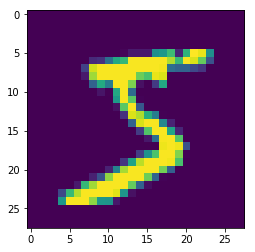

In [17]:
#imshow takes in x and displays a 2D image
plt.imshow(image.reshape((28,28)))
#reshaped as 28,28 because 1 just says the image is black and white 
#and we dont need that
#viridis is the default coloring of the plotting, not the color of the image

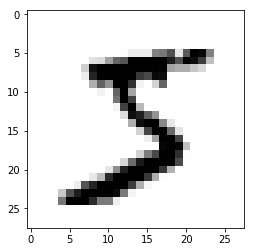

In [19]:
#to plot in gray scale use cmap color mapping
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')

In [21]:
#load training data in batches
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size= 100, shuffle= True)

test_loader = DataLoader(test_data, batch_size= 500, shuffle=False)

In [24]:
from torchvision.utils import make_grid
#set print options to format pretty
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [25]:
#first batch
for images, labels in train_loader:
    #60,000 / 100 60 times if we did not break 
    break
    

In [26]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [27]:
#now images is 100 images, with one color channel and they are 28,28
images.shape

torch.Size([100, 1, 28, 28])

In [29]:
labels.shape

torch.Size([100])

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


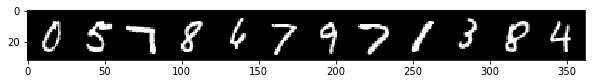

In [31]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to Width Height Color channel
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Next Steps
- define multilayer perceptron model
- count model parameters
- define loss and optimzier
- flatten training data
- train and evaluate model

In [32]:
class MultilayerPerceptron(nn.Module):
    
    def __init__(self, in_sz= 784, out_sz= 10, layers=[120,84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim= 1)

In [33]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [34]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


There are a lot of parameters in the ANN model, the CNN model will have many less parameters and be more efficient (these are also small images so imagine if they were larger)

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
#flatten out training data want shape to be [100,784]
images.view(100, -1).shape

torch.Size([100, 784])

Now we will train and evaluate the model

In [42]:
import time
start_time = time.time()

#Train

epochs = 10

#trackers (optional but nice to see)
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
    
        b+=1
        
        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        
        #optional but nice to see
        #will show the most likely class of the predicted value
        predicted = torch.max(y_pred.data, 1)[1] 
        batch_corr = (predicted == y_train).sum() #shows summed correct values in each batch
        trn_corr += batch_corr #total correct from training
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} batch {b} loss:{loss.item()} accuracy:{acc}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    #run test data during the training
    with torch.no_grad():
        
        for b, (X_test, y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500, -1))
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
        
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

#calculate total time that has passed and duration in minutes
total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 batch 200 loss:0.23945073783397675 accuracy:94.78
Epoch 0 batch 400 loss:0.17613601684570312 accuracy:94.9975
Epoch 0 batch 600 loss:0.16645146906375885 accuracy:95.30333333333333
Epoch 1 batch 200 loss:0.11878654360771179 accuracy:96.53
Epoch 1 batch 400 loss:0.11177343130111694 accuracy:96.6675
Epoch 1 batch 600 loss:0.12082257866859436 accuracy:96.765
Epoch 2 batch 200 loss:0.12871304154396057 accuracy:97.61
Epoch 2 batch 400 loss:0.0844050720334053 accuracy:97.4675
Epoch 2 batch 600 loss:0.03616069257259369 accuracy:97.48833333333333
Epoch 3 batch 200 loss:0.05136910825967789 accuracy:98.17
Epoch 3 batch 400 loss:0.04968568682670593 accuracy:98.09
Epoch 3 batch 600 loss:0.07955300062894821 accuracy:98.02
Epoch 4 batch 200 loss:0.04912809282541275 accuracy:98.54
Epoch 4 batch 400 loss:0.07232561707496643 accuracy:98.47
Epoch 4 batch 600 loss:0.037756167352199554 accuracy:98.43333333333334
Epoch 5 batch 200 loss:0.017593229189515114 accuracy:98.865
Epoch 5 batch 400 loss:0.02

can see that as more batches are ran the accuracty increases

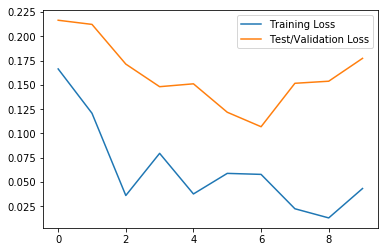

In [45]:
plt.plot(train_losses, label= 'Training Loss')
plt.plot(test_losses, label='Test/Validation Loss')
plt.legend()

Test is expected to be higher than training since the weights and biases are not adjusted

In [46]:
train_correct[0]/600

tensor(95)

In [48]:
train_acc = [t/600 for t in train_correct]

In [49]:
test_acc = [t/100 for t in test_correct]

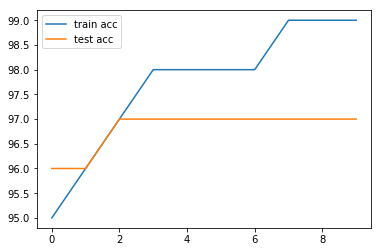

In [50]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label= 'test acc')
plt.legend()

Look for somewehre around point of intersection for number of epochs you should train for. Once training data flattens out you definitely dont want to train for more than that many epochs so in this case 8 or you will overfit the model

In [51]:
# NEW UNSEEN DATA

test_load_all = DataLoader(test_data, batch_size= 10000, shuffle= False)

In [52]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [55]:
#total accuracy on the new unseen test data
100*correct.item()/len(test_data)

97.59

In [57]:
confusion_matrix(predicted.view(-1), y_test.view(-1))
#diagonal is how many its getting right

array([[ 967,    0,    3,    0,    1,    1,    2,    0,    5,    0],
       [   0, 1127,    4,    0,    0,    0,    4,    3,    1,    2],
       [   2,    2, 1002,    4,    2,    0,    4,    6,    4,    0],
       [   3,    0,    4,  978,    1,    6,    1,    1,    5,    4],
       [   0,    0,    2,    0,  959,    1,    6,    0,    3,    8],
       [   1,    0,    0,   11,    0,  877,   11,    1,   10,    5],
       [   1,    2,    1,    0,    5,    2,  928,    0,    2,    0],
       [   2,    0,   11,    8,    4,    2,    0, 1012,    6,   13],
       [   3,    4,    4,    2,    1,    1,    2,    1,  936,    4],
       [   1,    0,    1,    7,    9,    2,    0,    4,    2,  973]],
      dtype=int64)